# PIV computation

## Launching the topology of computation for PIV

In [1]:
from fluidimage.topologies.piv import TopologyPIV

We use a class function to create an object containing the parameters.

In [2]:
params = TopologyPIV.create_default_params()

The representation of this object is useful. In Ipython, just do:

In [3]:
params


<params>
  {"program": "fluidimage", "module": "fluidimage.topologies.piv", "class":
  "TopologyPIV"}
  <series ind_start="0" ind_step="1" ind_stop="None" path="" strcouple="i:i+2"/>  

  <saving how="ask" path="None" postfix="piv"/>  

  <piv0 coef_correl_no_displ="None" displacement_max="None"
        displacement_mean="None" method_correl="fftw"
        method_subpix="2d_gaussian2" nb_peaks_to_search="1" nsubpix="None"
        particle_radius="3" shape_crop_im0="48" shape_crop_im1="None">
    <grid from="overlap" overlap="0.5"/>  

  </piv0>

  <mask strcrop="None"/>  

  <fix correl_min="0.2" displacement_max="None" threshold_diff_neighbour="10"/>  

  <multipass coeff_zoom="2" number="1" smoothing_coef="0.5" subdom_size="200"
             threshold_tps="1.0" use_tps="last"/>  

</params>

We here see a representation of the default parameters. Some elements have a `_doc` attribute. For example:

In [4]:
params.multipass._print_doc()

Documentation for params.multipass
----------------------------------

Multipass PIV parameters:

number : int (default 1)
    Number of PIV passes.

coeff_zoom : integer or iterable of size `number - 1`.

    Reduction coefficient defining the size of the interrogation windows for
    the passes 1 (second pass) to `number - 1` (last pass) (always
    defined comparing the passes `i-1`).

use_tps : bool or 'last'

    If it is True, the interpolation is done using the Thin Plate Spline method
    (computationnally heavy but sometimes interesting). If it is 'last', the
    TPS method is used only for the last pass.

subdom_size : int

    Number of vectors in the subdomains used for the TPS method.

smoothing_coef : float

    Coefficient used for the TPS method. The result is smoother for larger
    smoothing_coef.

threshold_tps :  float

    Allowed difference of displacement (in pixels) between smoothed and input
    field for TPS filter.



We can of course modify these parameters. An error will be raised if we accidentally try to modify a non existing parameter. We at least need to give information about where are the input images:

In [5]:
params.series.path = '../../image_samples/Karman/Images'
params.series.ind_start = 1

params.piv0.shape_crop_im0 = 64
params.multipass.number = 2
params.multipass.use_tps = False

params.saving.how = 'recompute'
params.saving.postfix = 'piv_ipynb'

In [6]:
topology = TopologyPIV(params)

nb_cpus_allowed = 4
nb_max_workers =  6
nb_max_workers_io =  4
Add 3 PIV fields to compute.
Files of serie 0: ('Karman_01.bmp', 'Karman_02.bmp')
Files of serie 1: ('Karman_02.bmp', 'Karman_03.bmp')



We then launch the computation by running the function `topology.compute`:

In [7]:
topology.compute()

INFO: path results:
../../image_samples/Karman/Images.piv_ipynb
INFO: 2017-10-20_09-25-57.21: start compute. mem usage: 140.004 Mb
INFO: 0.02 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_02.bmp). mem usage: 140.004 Mb
INFO: 0.02 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_03.bmp). mem usage: 140.016 Mb
INFO: 0.03 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_04.bmp). mem usage: 140.539 Mb
INFO: work fluidimage.topologies.waiting_queues.base.load_image (Karman_02.bmp) done in 0.08 s
INFO: work fluidimage.topologies.waiting_queues.base.load_image (Karman_04.bmp) done in 0.08 s
INFO: 0.12 s. Launch work builtins.method.calcul (Karman_01.bmp-Karman_02.bmp). mem usage: 140.969 Mb
INFO: work fluidimage.topologies.waiting_queues.base.load_image (Karman_03.bmp) done in 0.18 s
INFO: 0.22 s. Launch work builtins.method.calcul (Karman_02.bmp-Karman_03.bmp). mem usage: 141.242 Mb
INFO: 0.23 s. Launch work 

The output files are saved in the directory ../../image_samples/Karman/Images.piv_ipynb/

In [8]:
!ls ../../image_samples/Karman/Images

Karman_01.bmp  Karman_02.bmp  Karman_03.bmp  Karman_04.bmp


In [9]:
!ls ../../image_samples/Karman/Images.piv_ipynb

log_2017-04-10_09-26-02_14759.txt     params_2017-10-20_09-25-57_6279.xml
log_2017-10-19_17-12-00_10055.txt     piv_01-02.h5
log_2017-10-20_09-25-57_6279.txt      piv_02-03.h5
params_2017-04-10_09-26-02_14759.xml  piv_03-04.h5
params_2017-10-19_17-12-02_10055.xml


## Analyzing the computation

In [10]:
from fluidimage.topologies.log import LogTopology
log = LogTopology('../../image_samples/Karman/Images.piv_ipynb')

Parsing log file:  ../../image_samples/Karman/Images.piv_ipynb/log_2017-10-20_09-25-57_6279.txt
parse line 0

In [11]:
log.durations

{'builtins.function.save_piv_object': [0.07, 0.03, 0.1],
 'builtins.method.calcul': [0.5, 0.54, 0.66],
 'fluidimage.topologies.waiting_queues.base.load_image': [0.08, 0.18, 0.08]}

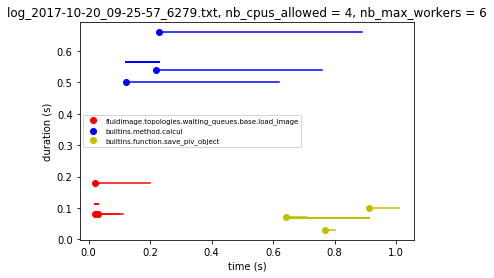

In [12]:
log.plot_durations()

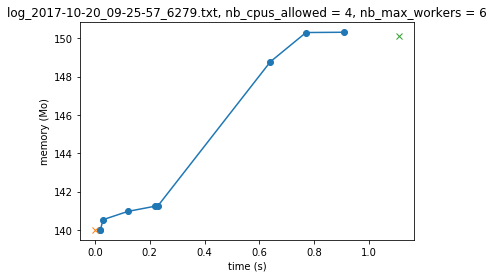

In [13]:
log.plot_memory()

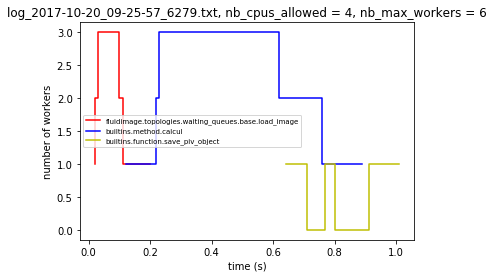

In [14]:
log.plot_nb_workers()

## Loading the output files

In [15]:
cd ../../image_samples/Karman/Images.piv_ipynb

/home/users/augier3pi/Dev/fluidimage/image_samples/Karman/Images.piv_ipynb


In [16]:
from fluidimage import create_object_from_file

In [17]:
o = create_object_from_file('piv_01-02.h5')

In [18]:
print([s for s in dir(o) if not s.startswith('_')])

['append', 'couple', 'display', 'file_name', 'make_light_result', 'params', 'passes', 'piv0', 'piv1', 'save']


In [19]:
print([s for s in dir(o.piv1) if not s.startswith('_')])

['correls_max', 'couple', 'deltaxs', 'deltaxs_final', 'deltaxs_wrong', 'deltays', 'deltays_final', 'deltays_wrong', 'display', 'errors', 'get_images', 'ixvecs_final', 'iyvecs_final', 'params', 'save', 'xs', 'ys']


press alt+h for help


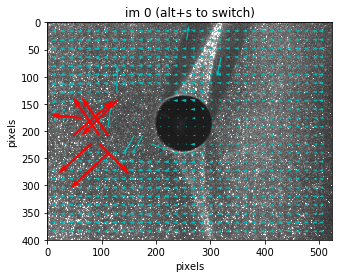

In [20]:
o.display()

press alt+h for help


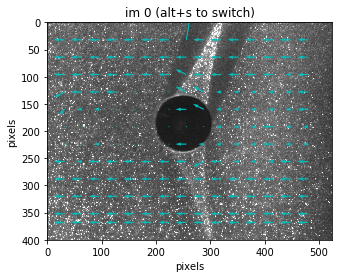

In [29]:
o.piv0.display(show_interp=False, scale=0.1, show_error=False, pourcent_histo=99, hist=False, show_correl=True)

The output PIV files are just hdf5 files. If you just want to load the final velocity field, do it manually with h5py.

In [28]:
import h5py
with h5py.File('piv_01-02.h5') as f:
    deltaxs_final = f['piv1/deltaxs_final'].value